# Drug Nomenclature

    T0: First timepoint 
    (Time Zero, after selection of cells with sgRNA library, and starting point of drug dosing)
    DMSO: DMSO treated 
    Pi: PARP inhibitor (olaparib; AZD2281)
    Ri: ATR inhibitor (AZD6738)
    Wi: WEE1 inhibitor (AZD1775)
    Mi: ATM inhibitor (AZD0156)
    Ki: DNAPK inhibitor (AZD7648)


    PiRi: PARP inhibitor + ATR inhibitor
    PiWi: PARP inhibitor + WEE1 inhibitor
    PiMi: PARP inhibitor + ATM inhibitor
    PiKi: PARP inhibitor + DNAPK inhibitor

In [1]:
drug_names = {
    'Pi': 'PARPi',
    'Ri': 'ATRi',
    'Wi': 'WEE1i',
    'Mi': 'ATMi',
    'Ki': 'DNAPKi',
    'PiRi': 'PARPi+ATRi',
    'PiWi': 'PARPi+WEE1i',
    'PiMi': 'PARPi+ATMi',
    'PiKi': 'PARPi+DNAPKi'
}

# Load data

In [2]:
import sys
import pandas as pd
from scipy import stats
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from venn import venn 
from upsetplot import from_contents,UpSet
from matplotlib.backends.backend_pdf import PdfPages
import stringdb

# sys.path.append("/rumi/shams/abe/Projects/ScreenProcessing/")
sys.path.append("/data_gilbert/home/aarab/ScreenProcessing")

import screen_analysis as scpro
from utils import *

In [3]:
# help(scpro)

In [4]:
Ci = scpro.loadData('CRISPRi/Analysis/PiKiMiRiWi/PiKiMiRiWi_2reps')

Ca_k562 = scpro.loadData('CRISPRa/Analysis/k562/k562a_PiRi')
Ca_A549 = scpro.loadData('CRISPRa/Analysis/single_replicate_A549/PiRiWi_1stRep/CRISPRa_PiWiRi')

## CRISPRi Analysis
        gamma:T0:DMSO
        rho1:DMSO:Pi
        rho2:DMSO:Ki
        rho3:DMSO:Mi
        rho4:DMSO:Ri
        rho5:DMSO:Wi
        rho6:DMSO:PiKi
        rho7:DMSO:PiMi
        rho8:DMSO:PiRi
        rho9:DMSO:PiWi



In [5]:
# {score for score,_,_ in Ci['gene scores'].columns.tolist()}

In [6]:
Ci_data = {
    'PARPi':{'rho':  get_score(Ci,'rho1','Pi')},
    'DNAPKi':{'rho':  get_score(Ci,'rho2','Ki')},
    'ATMi':{'rho':  get_score(Ci,'rho3','Mi')},
    'ATRi':{'rho':  get_score(Ci,'rho4','Ri')},
    'WEE1i':{'rho':  get_score(Ci,'rho5','Wi')},
    'PARPi+DNAPKi':{'rho':  get_score(Ci,'rho6','PiKi')},
    'PARPi+ATMi':{'rho':  get_score(Ci,'rho7','PiMi')},
    'PARPi+ATRi':{'rho':  get_score(Ci,'rho8','PiRi')},
    'PARPi+WEE1i':{'rho':  get_score(Ci,'rho9','PiWi')}
}

Pi ->
	mean(neg control gRNAs rho score): -0.0001401984993996408
	std(neg control gRNAs rho score): 0.12540825080834397
Ki ->
	mean(neg control gRNAs rho score): -0.0005673308068281182
	std(neg control gRNAs rho score): 0.16614558840684682
Mi ->
	mean(neg control gRNAs rho score): 0.0017851335633094487
	std(neg control gRNAs rho score): 0.14801638476027543
Ri ->
	mean(neg control gRNAs rho score): 0.0010093567889871565
	std(neg control gRNAs rho score): 0.1327425021656452
Wi ->
	mean(neg control gRNAs rho score): 0.0022317642323502387
	std(neg control gRNAs rho score): 0.1487822724803441
PiKi ->
	mean(neg control gRNAs rho score): -0.0033752033251339595
	std(neg control gRNAs rho score): 0.17291015247254843
PiMi ->
	mean(neg control gRNAs rho score): -0.004468641076695257
	std(neg control gRNAs rho score): 0.16403386577453327
PiRi ->
	mean(neg control gRNAs rho score): -0.00398767757688899
	std(neg control gRNAs rho score): 0.15472963895091643
PiWi ->
	mean(neg control gRNAs rho score)

Sara
> Hi! Can you do me a favor? I was wondering if you can send me the top 100 hits from the DNAPKi CRISPRi screen and then the top 100 hits from the DNAPKi/PARPi CRISPRi screen?



In [40]:
pd.DataFrame(
    # DNAPKi
    {'DNAPKi Positive rho score':
        Ci_data['DNAPKi']['rho'][
            (Ci_data['DNAPKi']['rho']['Ki.rho.norm'] > 0) & 
            (Ci_data['DNAPKi']['rho']['Ki.pvalue'] < 0.01)
        ].sort_values(['Ki.rho.norm'],ascending=False).iloc[:100].index.to_list(),
    'DNAPKi Negative rho score':
        Ci_data['DNAPKi']['rho'][
            (Ci_data['DNAPKi']['rho']['Ki.rho.norm'] < 0) & 
            (Ci_data['DNAPKi']['rho']['Ki.pvalue'] < 0.01)
        ].sort_values(['Ki.rho.norm'],ascending=True).iloc[:100].index.to_list(),
    
    # DNAPKi/PARPi
    'PARPi+DNAPKi Positive rho score':
        Ci_data['PARPi+DNAPKi']['rho'][
            (Ci_data['PARPi+DNAPKi']['rho']['PiKi.rho.norm'] > 0) & 
            (Ci_data['PARPi+DNAPKi']['rho']['PiKi.pvalue'] < 0.01)
        ].sort_values(['PiKi.rho.norm'],ascending=False).iloc[:100].index.to_list(),
    'DNAPKi+PARPi Negative rho score':
        Ci_data['PARPi+DNAPKi']['rho'][
            (Ci_data['PARPi+DNAPKi']['rho']['PiKi.rho.norm'] < 0) & 
            (Ci_data['PARPi+DNAPKi']['rho']['PiKi.pvalue'] < 0.01)
        ].sort_values(['PiKi.rho.norm'],ascending=True).iloc[:100].index.to_list()
    },
).to_csv('enrichr_inputs.csv',index=False)

## CRISPRa Analysis
### A549 cell line 
    1 replicate for all conditions
    PiRiWi_1stRep

    Phenotypes Reported as Log2(Fold Change)

    T0 = T0 
    DMSO = DMSO 
    Pi = Parpi 
    Ri = ATRi
    Wi = Wee1i 
    PiWi = Parpi/Wee1i combo 
    PiRi = Parpi/ATRi combo 

    Gamma:T0|DMSO
    Tau1:T0|Pi
    Tau2:T0|Wi
    Tau3:T0|Ri
    Tau4:T0|PiRi
    Tau5:T0|PiWi
    Rho1:DMSO|Pi
    Rho2:DMSO|Ri
    Rho3:DMSO|Wi
    Rho4:DMSO|PiRi
    Rho5:DMSO|PiWi

In [6]:
# {score for score,_,_ in Ca_k562['gene scores'].columns.tolist()}

In [7]:
# {score for score,_,_ in Ca_A549['gene scores'].columns.tolist()}

In [8]:
# Ca_data = {
#     'Pi':{'rho':  get_score(Ca_A549,'rho1','Pi',rep='Rep1')},
#     'Ri':{'rho':  get_score(Ca_A549,'rho2','Ri',rep='Rep1')},
#     'Wi':{'rho':  get_score(Ca_A549,'rho3','Wi',rep='Rep1')},
#     'PiRi':{'rho':  get_score(Ca_A549,'rho4','PiRi',rep='Rep1')},
#     'PiWi':{'rho':  get_score(Ca_A549,'rho5','PiWi',rep='Rep1')}
# }

___
# Data normalization 

Tom's suggestion - https://www.nature.com/articles/s41586-020-2099-x#Sec11

https://github.com/biohank/CRISPR_screen_analysis

> ### Calculation of growth and drug resistance phenotypes

> Calculate sgRNAs Effect sizes - ScreenProcessing

> In brief, log2 fold enrichments of sgRNAs were first measured between two samples. For any given phenotype, a median log2 fold enrichment of all negative control sgRNAs (non-targeting and safe sgRNAs) was measured and this median value was subtracted from log2 fold enrichments of all sgRNAs to account for systematic bias in screens. Lastly, log2 fold enrichments of all sgRNAs were divided by the standard deviation of negative control sgRNAs to yield phenotype Z scores ($pZ$) of sgRNAs which we used as effect size of sgRNAs. Effect size of a gene is the median value of all sgRNAs that target the gene. We used modified t-value scores as our phenotype scores for genes, which account for both consistency and strength of all sgRNA effects for given genes.

> Our phenotype scores based on t-value scores were computed as: $$
\text{phenotype score (T-score)}=\frac{(U_{gene} − U_{ctrl})}{\sqrt[2]{\frac{S_{var}}{N_{exp}} + \frac{S_{var}}{N_{ctrl}}}}$$
where $U_{gene}$ is the median effect of all sgRNAs ($pZ$) for a given gene, $U_{ctrl}$ is the median effect of all negative control sgRNAs ($pZ$), and $S_{var}$ is $Var_{gene} × (N_{exp} − 1) + Var_{ctrl} × (N_{ctrl} − 1)$, where $Var_{gene}$ is the variance of sgRNA effects ($pZ$) for a given gene, $N_{exp}$ is the number of sgRNAS for a given gene and $N_{ctrl}$ is the average number of sgRNAs per gene in a given screen.

> To combine data from two experimental replicates, normalized $pZ$ scores of sgRNAs from two replicates were pooled together and gene effects and phenotype scores were calculated from the pooled sgRNAs as described above.

In [9]:
Ci_df = pd.concat([Ci_data[drug]['rho'] for drug in Ci_data.keys()],axis=1).add_prefix('Ci.')
Ci_df_rho = Ci_df.filter(regex='rho$', axis=1)
Ci_df_rho_norm = Ci_df.filter(regex='rho.norm$', axis=1)
Ci_df_rho_norm.columns = Ci_df_rho.columns

In [10]:
Ci_df_rho.to_csv('Ci_df_rho.txt',sep='\t')

In [11]:
Ci_df_rho_norm.to_csv('Ci_df_rho_norm.txt',sep='\t')

# Plots

In [12]:
!mkdir -p figures

### Correlation Heatmaps with Hierarchical Clustering

https://www.kaggle.com/sgalella/correlation-heatmaps-with-hierarchical-clustering

In [13]:
# sns.set_theme(style="white")

# fig_c,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.1]}, figsize=(13,6))

# plot_corr(df_rho,ax1,vmin=-0.1,vmax=1)
# 'Actual rho scores'
# plot_corr(df_rho_norm,ax2,vmin=-0.1,vmax=1)
# 'z-score normalized'

# plt.savefig('figures/rho_zscore_corr.pdf')
# plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


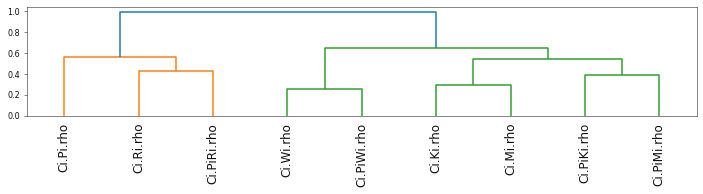

In [14]:
Z = corr_clust(Ci_df_rho, dendrogram=True)

plt.figure(figsize=(12,2))
dendrogram(Z, labels=Ci_df_rho.columns, orientation='top', 
           leaf_rotation=90);
plt.show()

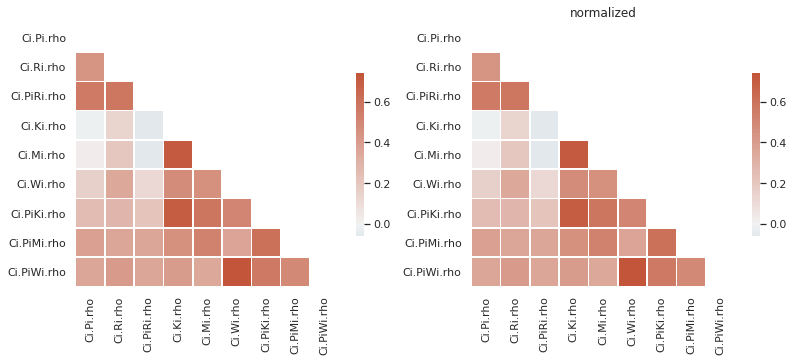

In [15]:
sns.set_theme(style="white")

fig_c,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.1]}, figsize=(13,6))

plot_corr(Ci_df_rho,ax1)#,vmin=0,vmax=0.5)
ax1.set_title('')
plot_corr(Ci_df_rho_norm,ax2)#,vmin=0,vmax=0.1)
ax2.set_title('normalized')

plt.savefig('figures/rho_zscore_corr.pdf')
plt.show()


# sns.set_theme(style="white")
# plt.figure(figsize=(15,10))
# correlations = clustered.corr()
# sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
#             annot_kws={"size": 7}, vmin=-1, vmax=1);

# fig_c,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.1]}, figsize=(13,6))
# f,ax1 = plt.subplots(1,1, gridspec_kw={'width_ratios':[0.1]}, figsize=(13,6))
# plot_corr(Ci_df_rho,ax=ax1)#,vmin=-0.1,vmax=1)
# ax1.set_title('normalized')

# # plt.savefig('figures/rho_zscore_corr.pdf')
# plt.show()

#### Histogram 

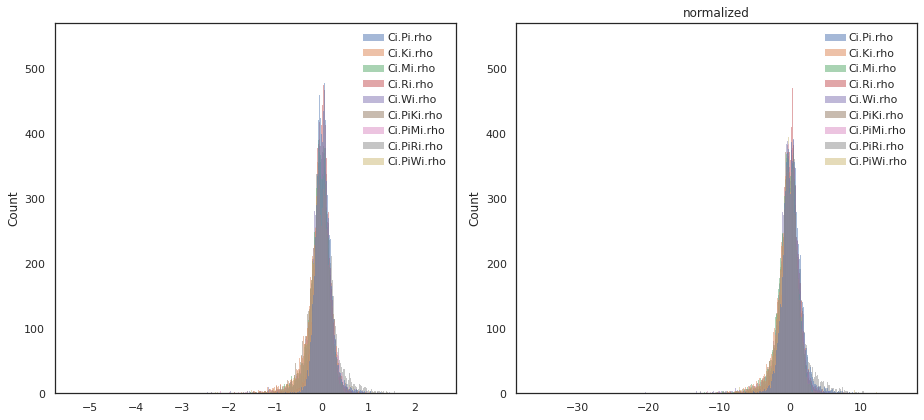

In [16]:
# plot 
fig_h,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.1]}, figsize=(13,6))

al = 0.5

ax1.get_shared_y_axes().join(ax1,ax2)

h1 = sns.histplot(Ci_df_rho,alpha = al,ax=ax1)
h1.set_title('')

h2 = sns.histplot(Ci_df_rho_norm,alpha = al,ax=ax2)
h2.set_title('normalized')

fig_h.tight_layout()
plt.savefig('figures/rho_zscore_histogram.pdf')
plt.show()

<!-- Becky: -->
Scatter plot between normalized and not normalized ...

# Intersectional analysis 

In [174]:
data.loc['PRDX1',:]

Ci.Ki.pvalue       0.000111
Ci.Ki.rho        -18.389215
Ci.Mi.pvalue       0.000171
Ci.Mi.rho         -9.475628
Ci.Pi.pvalue       0.000189
Ci.Pi.rho         -8.235583
Ci.PiKi.pvalue     0.000111
Ci.PiKi.rho      -21.444909
Ci.PiMi.pvalue     0.000111
Ci.PiMi.rho      -15.187708
Ci.PiRi.pvalue     0.000116
Ci.PiRi.rho       -9.590746
Ci.PiWi.pvalue     0.000114
Ci.PiWi.rho      -14.409710
Ci.Ri.pvalue       0.000206
Ci.Ri.rho         -6.895989
Ci.Wi.pvalue       0.001935
Ci.Wi.rho         -5.370100
Name: PRDX1, dtype: float64

['Pi', 'Ri', 'Wi', 'Mi', 'Ki', 'PiRi', 'PiWi', 'PiMi', 'PiKi']

In [202]:
data = pd.concat([
    Ci_df_rho_norm, 
    # Ci_df_rho, 
    Ci_df.filter(regex='pvalue$', axis=1)],axis=1).sort_index(axis=1)

rho_thr  = 4
pval_thr = 0.001


for abb in drug_names:
    screen = drug_names[abb]
    print (screen)
    up,dn = find_top(data.filter(regex=f'Ci.{abb}*',axis=1),f'Ci.{abb}.rho',rho_thr,f'Ci.{abb}.pvalue',pval_thr)
    Ci_data[screen]['up'] = up.index.to_list()
    Ci_data[screen]['dn'] = dn.index.to_list()
    print ('_'*8)

PARPi
up:  94
down: 23
________
ATRi
up:  14
down: 58
________
WEE1i
up:  39
down: 203
________
ATMi
up:  5
down: 142
________
DNAPKi
up:  16
down: 190
________
PARPi+ATRi
up:  215
down: 93
________
PARPi+WEE1i
up:  81
down: 161
________
PARPi+ATMi
up:  48
down: 162
________
PARPi+DNAPKi
up:  25
down: 157
________


In [187]:
# for screen in Ca_data.keys():
#     print (screen)
#     up,dn = find_top(df.filter(regex=f'{screen}*',axis=1),f'Ca.{screen}.rho',0.3,f'Ca.{screen}.pvalue',0.01)
#     Ca_data[screen]['up'] = up.index.to_list()
#     Ca_data[screen]['dn'] = dn.index.to_list()
#     print ('_'*8)

## Ci UpSet.plot

In [188]:
def Ci_make_two_upsetplot(UpSetData_up,UpSetData_dn,name):
    # The PDF document
    pdf_pages = PdfPages(f'figures/{name}.pdf')


    fig_u1 = plt.figure(figsize=(5, 5), dpi=300)
    fig_u2 = plt.figure(figsize=(5, 5), dpi=300)

    u1 = UpSet(
        UpSetData_up, subset_size='count',
    #     orientation='vertiCil',
        show_counts='%d',
        min_degree=2
    ).plot(fig = fig_u1)
    fig_u1.suptitle('CRISPRi rho up (Z-Score normalized)\nResistance')
    pdf_pages.savefig(fig_u1)

    u2 = UpSet(
        UpSetData_dn, subset_size='count',
    #     orientation='vertiCil',
        show_counts='%d',
        min_degree=2
    ).plot(fig = fig_u2)
    fig_u2.suptitle('CRISPRi rho down (Z-Score normalized)\nSensitivity')
    pdf_pages.savefig(fig_u2)

    # Write the PDF document to the disk
    pdf_pages.close()

In [287]:
def plot_heatmap(df):

    f,ax1 = plt.subplots(1,1, figsize=(8,8))

    ax1.get_shared_y_axes().join(ax1,ax2)

    g1 = sns.heatmap(
        df,
    #     annot=True,
        vmin=-4, vmax=4,
        cmap="vlag",
        # cbar=False,
        ax=ax1
    )

    g1.set_ylabel('')
    g1.set_xlabel('')
    g1.set_title('')


    # # may be needed to rotate the ticklabels correctly:

    # tl = g1.get_xticklabels()
    # g1.set_xticklabels(tl, rotation=90)
    # tly = g1.get_yticklabels()
    # g1.set_yticklabels(tly, rotation=0)

    f.tight_layout()

In [189]:
# %%time 
# UpSetData_all_up = from_contents(dict([(screen+' up',Ci_data[screen]['up']) for screen in Ci_data]))
# UpSetData_all_dn = from_contents(dict([(screen+' dn',Ci_data[screen]['dn']) for screen in Ci_data]))

# Ci_make_two_upsetplot(UpSetData_all_up, UpSetData_all_dn,'rho_zscore_CRISPRi_all_upsetplot')

In [190]:
# from functools import reduce

# query_dict = dict([(screen+' dn',Ci_data[screen]['dn']) for screen in Ci_data])

# sensitivity_genes = reduce(set.intersection, (set(val) for val in query_dict.values()))

In [191]:
# sensitivity_genes

In [192]:
# Ci_df_rho_norm.loc[sensitivity_genes,]

### FIGURE 1-B
CRISPRi sensitivity

> __CRISPRi-based genome-scale identification of functional long noncoding RNA loci in human cells__
> - https://doi.org/10.1126/science.aah7111
> - Fig. 3A & B

- \# hits in each monotherapy
- \# unique hits each monotherapy
- Intersection sorted based on # of hits



In [196]:
drug_names.values()

dict_values(['PARPi', 'ATRi', 'WEE1i', 'ATMi', 'DNAPKi', 'PARPi+ATRi', 'PARPi+WEE1i', 'PARPi+ATMi', 'PARPi+DNAPKi'])

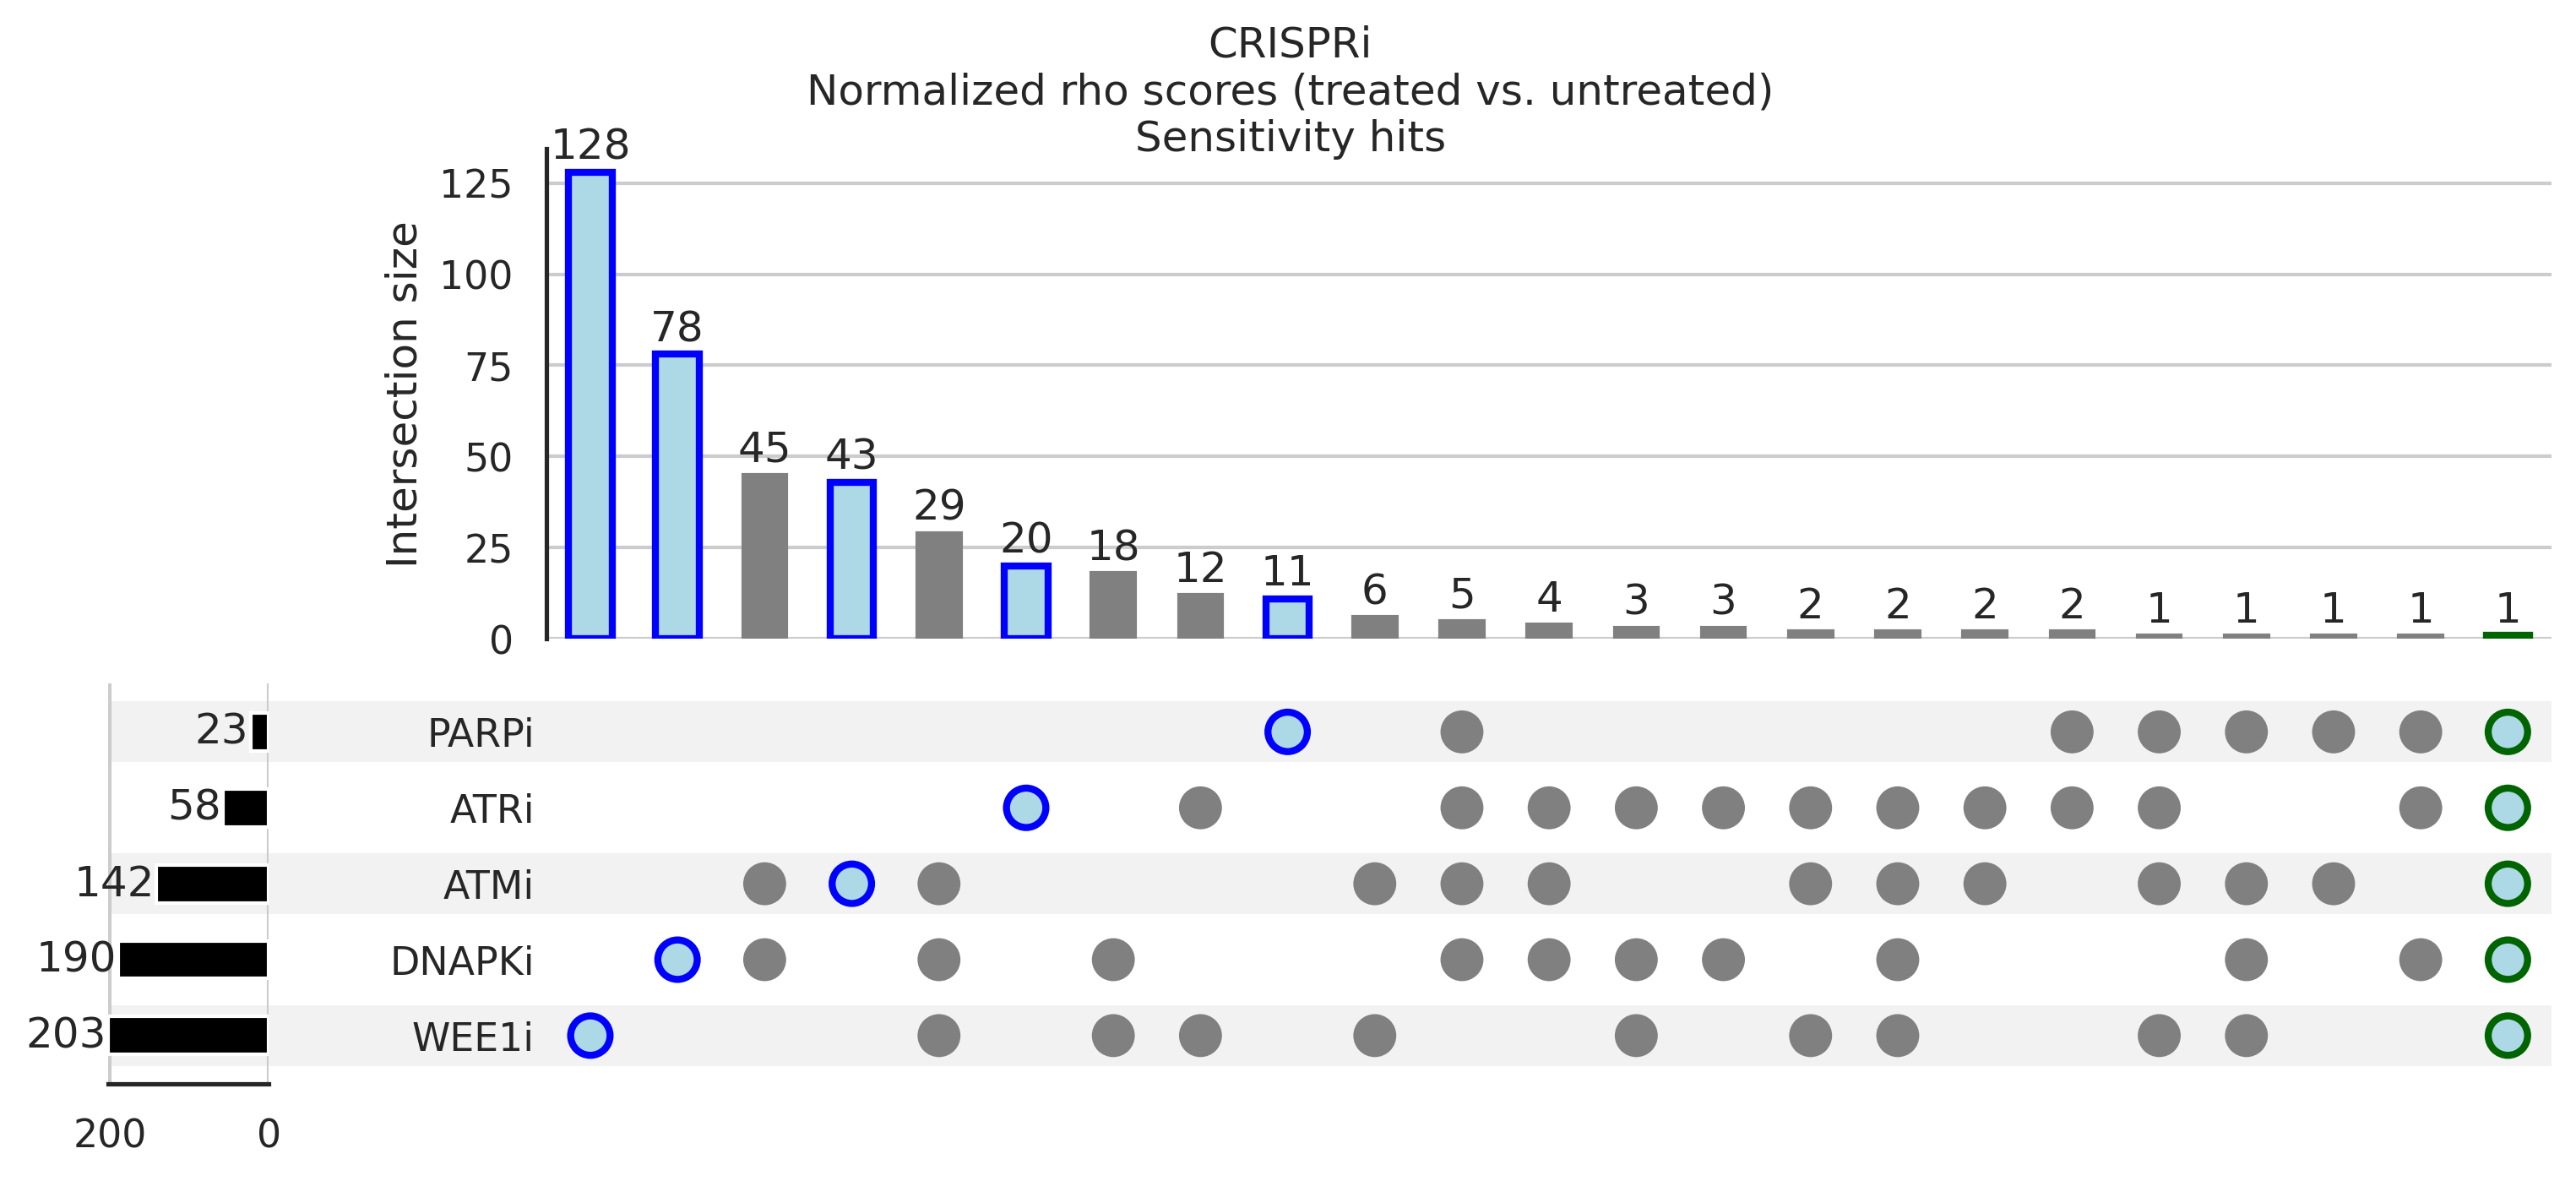

CPU times: user 580 ms, sys: 49.2 ms, total: 629 ms
Wall time: 626 ms


In [248]:
%%time 
# UpSetData_mono_up = from_contents(
#     dict([(screen+' up',Ci_data[screen]['up']) for screen in ['Pi', 'Ki', 'Mi', 'Ri', 'Wi']])
# )
UpSetData_mono_dn = from_contents(
    dict([(screen,Ci_data[screen]['dn']) for screen in ['PARPi', 'ATRi', 'WEE1i', 'ATMi', 'DNAPKi']])
)


fig_u2 = plt.figure(figsize=(3, 3), dpi=300)
u2 = UpSet(
    UpSetData_mono_dn, 
    subset_size='count',
    sort_categories_by  = 'cardinality',
    sort_by='cardinality',
    # orientation='vertiCil',
    show_counts='%d',
    other_dots_color=0.001, 
    # shading_color=0, 
    with_lines=False,
    # min_subset_size = 4,
    # max_degree=
    # min_degree=1,
    # element_size=40
    
)

u2.style_subsets(
    max_degree = 10,
    facecolor = 'grey',
)


u2.style_subsets(
    # present="Pi dn", 
    min_degree = 5 ,
    # absent="cat1", 
    facecolor="lightblue",
    edgecolor="darkgreen",
    linewidth=2
)

u2.style_subsets(
    # present="Pi dn", 
    max_degree = 1 ,
    # absent="cat1", 
    facecolor="lightblue",
    edgecolor="blue",
    linewidth=2
)

u2.plot(fig = fig_u2)

                    
fig_u2.suptitle('CRISPRi\nNormalized rho scores (treated vs. untreated)\nSensitivity hits',fontsize=12)
plt.savefig('figures/FIGURE1-B.pdf')  
plt.show()

### Figure 2-B
- Parpi and intersection with combo Sorted by number of intersection with all treatments at the end

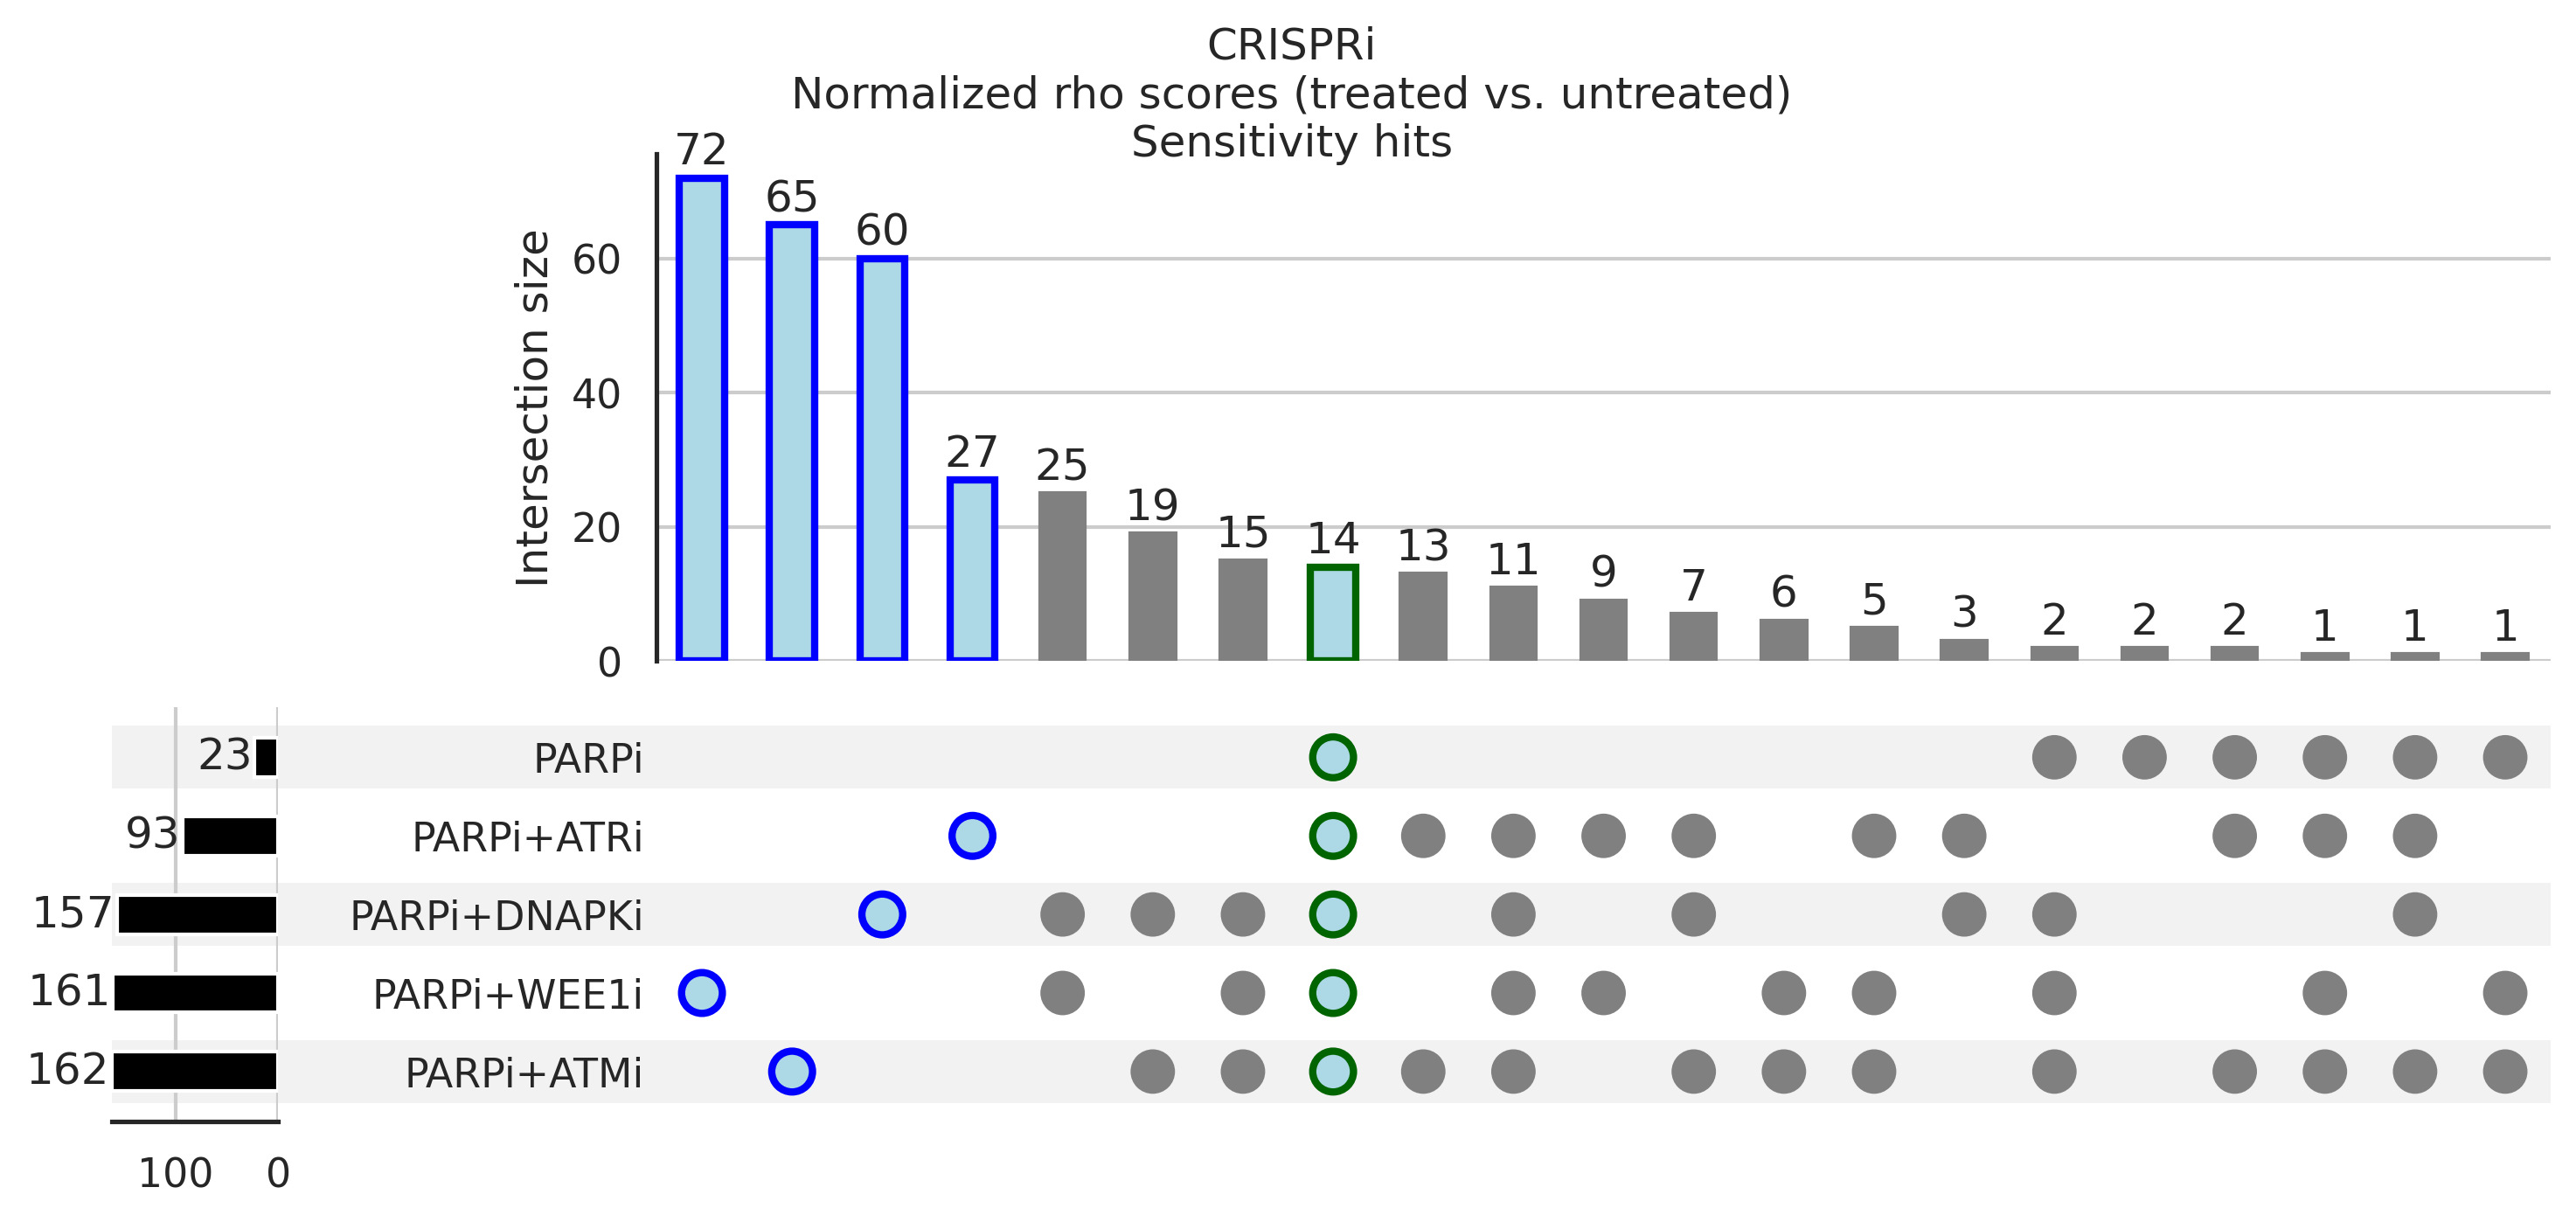

CPU times: user 676 ms, sys: 47.3 ms, total: 723 ms
Wall time: 723 ms


In [251]:
%%time 
# UpSetData_Pi_up = from_contents(dict([(screen+' up',Ci_data[screen]['up']) for screen in Ci_data if 'PARPi' in screen]))
UpSetData_Pi_dn = from_contents(dict([(screen,Ci_data[screen]['dn']) for screen in Ci_data if 'PARPi' in screen]))

# Ci_make_two_upsetplot(UpSetData_Pi_up, UpSetData_Pi_dn,'rho_zscore_CRISPRi_Pi_upsetplot')
fig_u2 = plt.figure(figsize=(5, 5), dpi=300)
u2 = UpSet(
    UpSetData_Pi_dn, 
    subset_size='count',
#     orientation='vertiCil',
    show_counts='%d',
    min_degree=1,
    
    sort_by='cardinality',
    # orientation='vertiCil',
    other_dots_color=0.001, 
    # shading_color=0, 
    with_lines=False,

)

u2.style_subsets(
    max_degree = 10,
    facecolor = 'grey',
)

u2.style_subsets(
    min_degree=5,
    # present="PARPi", 
    # absent="cat1", 
    facecolor='lightblue',edgecolor="darkgreen",
    linewidth=2
)

u2.style_subsets(
    max_degree=1,
    absent="PARPi",
    facecolor='lightblue',edgecolor="blue",
    linewidth=2
)

u2.plot(fig = fig_u2)

fig_u2.suptitle('CRISPRi\nNormalized rho scores (treated vs. untreated)\nSensitivity hits',fontsize=12)
plt.savefig('figures/FIGURE2-B.pdf')  
plt.show()

In [252]:
query_dict = dict([(screen+' dn',Ci_data[screen]['dn']) for screen in Ci_data if 'Pi' in screen])

sensitivity_genes = reduce(set.intersection, (set(val) for val in query_dict.values()))

In [253]:
len(sensitivity_genes)

14

In [254]:
for i in sensitivity_genes:
    print(i)

PSMC3IP
RAD51D
PRDX1
RAD51B
TRAIP
RNF8
H2AFX
RAD54L
DDX11
SWI5
RNASEH2B
RNASEH2C
RNASEH2A
EME1


### Unique in combo!


In [297]:
unique_combo = x[
    (
        (x['PARPi'] == False) & 
        (x['PARPi+DNAPKi'] == True) & 
        (x['PARPi+ATMi'] == False) & 
        (x['PARPi+ATRi'] == False) & 
        (x['PARPi+WEE1i'] == False)
    ) | (
        (x['PARPi'] == False) & 
        (x['PARPi+DNAPKi'] == False) & 
        (x['PARPi+ATMi'] == True) & 
        (x['PARPi+ATRi'] == False) & 
        (x['PARPi+WEE1i'] == False)
    ) | (
        (x['PARPi'] == False) & 
        (x['PARPi+DNAPKi'] == False) & 
        (x['PARPi+ATMi'] == False) & 
        (x['PARPi+ATRi'] == True) & 
        (x['PARPi+WEE1i'] == False)
    ) | (
        (x['PARPi'] == False) & 
        (x['PARPi+DNAPKi'] == False) & 
        (x['PARPi+ATMi'] == False) & 
        (x['PARPi+ATRi'] == False) & 
        (x['PARPi+WEE1i'] == True)
    )
].index.tolist()

In [307]:
pd.DataFrame(index=unique_combo).to_csv('unique_combo.txt',header=None)

#### PARPi+DNAPKi

In [274]:
x = UpSetData_Pi_dn.reset_index().set_index('id')
PARPi_DNAPKi = x[
    (x['PARPi'] == False) & 
    (x['PARPi+DNAPKi'] == True) & 
    (x['PARPi+ATMi'] == False) & 
    (x['PARPi+ATRi'] == False) & 
    (x['PARPi+WEE1i'] == False)
].index.tolist()
PARPi_DNAPKi

['ALG12',
 'ALG8',
 'B3GNT2',
 'C16orf93',
 'CCND3',
 'CCNL1',
 'CCP110',
 'CDK4',
 'CHD2',
 'CHTOP',
 'CNBP',
 'CSK',
 'CUL2',
 'DAD1',
 'DDRGK1',
 'DDX3X',
 'EIF1AX',
 'EIF3H',
 'EMC2',
 'FAM122A',
 'FBXL5',
 'FUBP1',
 'GLIS3',
 'GTF3C5',
 'HYOU1',
 'KCNE1L',
 'KIAA0947',
 'MIS18BP1',
 'MUTYH',
 'NAE1',
 'NEDD8',
 'NEDD8-MDP1',
 'NONO',
 'PET117',
 'POLQ',
 'PSME3',
 'RBM14-RBM4',
 'RFWD2',
 'RHOA',
 'RPE',
 'RPTOR',
 'RRP1',
 'SFPQ',
 'SSR1',
 'SSR2',
 'SSR3',
 'TARS',
 'TGFBR2',
 'TIAL1',
 'TIMM22',
 'TLN1',
 'TXNDC15',
 'TXNL4A',
 'UBR5',
 'USP5',
 'VPS29',
 'WDR44',
 'WWTR1',
 'ZNF451',
 'ZNF699']

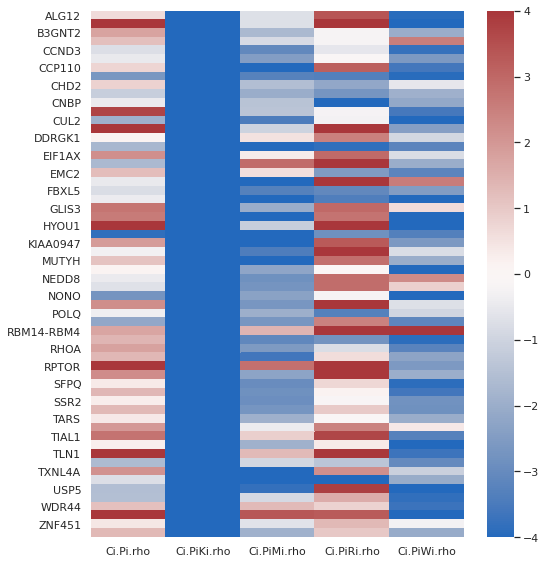

In [296]:
plot_heatmap(Ci_df_rho_norm.loc[PARPi_DNAPKi,list(Ci_df_rho_norm.columns.str.contains('Pi'))])

#### PARPi+ATMi

In [269]:
x = UpSetData_Pi_dn.reset_index().set_index('id')
x[
    (x['PARPi'] == False) & 
    (x['PARPi+ATMi'] == True) & 
    (x['PARPi+DNAPKi'] == False) & 
    (x['PARPi+ATRi'] == False) & 
    (x['PARPi+WEE1i'] == False)
].index.tolist()

['ACTG1',
 'ADSL',
 'ANKS3',
 'ANKS6',
 'ATXN2L',
 'AUNIP',
 'BLM',
 'BRD2',
 'C11orf30',
 'C16orf80',
 'C4orf27',
 'CCNB1',
 'CDC25B',
 'CDC73',
 'CLASRP',
 'CLTC',
 'CTR9',
 'CUL5',
 'DCP2',
 'DDX6',
 'DNAJA1',
 'DNPH1',
 'DOC2B',
 'DR1',
 'EEF1E1',
 'EIF4E2',
 'FAM120A',
 'FAM175B',
 'FANCI',
 'FANCL',
 'FOXM1',
 'GNB1L',
 'HEXIM1',
 'IL5',
 'KAT7',
 'KDM5A',
 'KRT18',
 'LEMD3',
 'LRBA',
 'LSM12',
 'MNT',
 'MOSPD2',
 'NEK7',
 'NEK8',
 'NSA2',
 'PAN3',
 'PAXIP1',
 'PDCD10',
 'PDCD6IP',
 'PRPF40A',
 'PRRC2A',
 'PTGES3',
 'RAD1',
 'RAD18',
 'RAD52',
 'RNF146',
 'SNRPB2',
 'SRSF11',
 'SRSF2',
 'SYVN1',
 'TFDP1',
 'TRAPPC8',
 'UBAP2L',
 'UBE2L3',
 'UBE4A']

#### PARPi+ATRi

In [270]:
x = UpSetData_Pi_dn.reset_index().set_index('id')
x[
    (x['PARPi'] == False) & 
    (x['PARPi+ATRi'] == True) & 
    (x['PARPi+DNAPKi'] == False) & 
    (x['PARPi+ATMi'] == False) & 
    (x['PARPi+WEE1i'] == False)
].index.tolist()

['ABCC1',
 'ATM',
 'BOD1L1',
 'C17orf53',
 'C4orf21',
 'CCDC101',
 'CCNF',
 'CDAN1',
 'CNOT4',
 'DDIT4',
 'FAM175A',
 'FAM83D',
 'IWS1',
 'LRRC14',
 'MCM4',
 'PARP2',
 'PRPF39',
 'RAD54B',
 'RFWD3',
 'SLC39A1',
 'SOCS3',
 'TADA1',
 'TRNAU1AP',
 'UBE2T',
 'UIMC1',
 'WIZ',
 'ZAR1L']

#### PARPi+WEE1i

In [271]:
x = UpSetData_Pi_dn.reset_index().set_index('id')
x[
    (x['PARPi'] == False) & 
    (x['PARPi+WEE1i'] == True) &
    (x['PARPi+ATMi'] == False) & 
    (x['PARPi+DNAPKi'] == False) & 
    (x['PARPi+ATRi'] == False) 
].index.tolist()

['ASCC3',
 'ATXN10',
 'C12orf57',
 'C18orf56',
 'CAD',
 'CBLL1',
 'CCAR1',
 'CCDC174',
 'CCNC',
 'CDK8',
 'CHD4',
 'COMMD6',
 'CPSF2',
 'CSTF3',
 'CTPS1',
 'CTU2',
 'DBF4',
 'DLGAP5',
 'DTYMK',
 'DUT',
 'EIF1',
 'ESYT1',
 'GSG2',
 'GTF2F1',
 'GTF3C3',
 'GTF3C4',
 'HBS1L',
 'HEATR3',
 'INTS6',
 'IPO9',
 'IVNS1ABP',
 'KIF18A',
 'KIF18B',
 'KIF2C',
 'KRAS',
 'KTI12',
 'MLF1IP',
 'MYEOV2',
 'NEDD9',
 'NFRKB',
 'ORC2',
 'PCBP1',
 'PFDN5',
 'PIKFYVE',
 'POLR3K',
 'RBL2',
 'RNPC3',
 'SERF2',
 'SGOL1',
 'SGOL2',
 'SLC39A10',
 'SLC7A6OS',
 'SMARCAL1',
 'SMARCE1',
 'SREK1',
 'SRPR',
 'STIP1',
 'TBCA',
 'TBCD',
 'TCEB1',
 'TUBA1C',
 'TYMS',
 'UVRAG',
 'VEZF1',
 'VPS33A',
 'YY1',
 'ZBTB17',
 'ZC3H10',
 'ZC3H13',
 'ZFR',
 'ZNF259',
 'ZNF367']

#### Heatmap

In [26]:
# # plot 
# genes = ['PRDX1','BCL2','RNASEH2C']

# f = plt.figure(figsize=(13,2))

# g1 = sns.heatmap(
#     Ci_df_rho.loc[genes,:], 
# #     annot=True,
#     vmin=-10, vmax=10,
#     cmap="vlag",
# #     cbar=False,
# )

# g1.set_ylabel('')
# g1.set_xlabel('')
# g1.set_title('Actual rho scores')

# tl = g1.get_xticklabels()
# g1.set_xticklabels(tl, rotation=90)
# tly = g1.get_yticklabels()
# g1.set_yticklabels(tly, rotation=0)

# f.tight_layout()
# # plt.savefig('figures/rho_zscore1_heatmap.pdf')

### Targeted iPAGE results

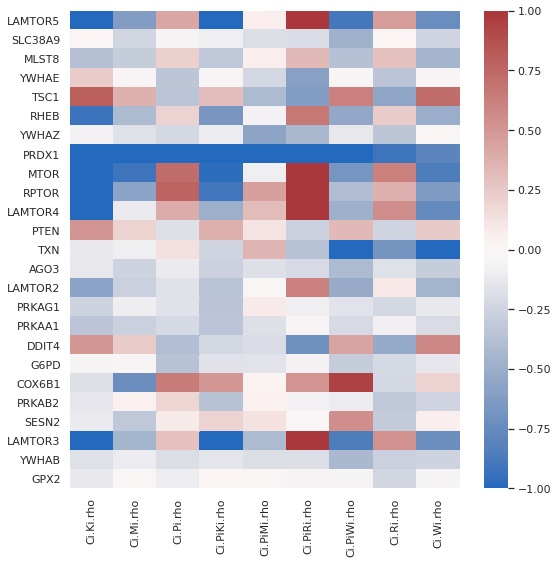

In [53]:
# plot 
my_genes = list(
    set([
         'DDIT4', 'PRDX1', 'PTEN', 'TSC1', 'TXN', 'YWHAE', 'YWHAZ',
         'AGO3', 'LAMTOR2', 'LAMTOR3', 'LAMTOR4', 'LAMTOR5', 'MLST8', 'MTOR', 'PRDX1', 'RHEB', 'RPTOR', 'SLC38A9', 'TXN', 'YWHAB',
         'DDIT4', 'G6PD', 'PRDX1', 'PRKAA1', 'PTEN', 'TSC1', 'YWHAB', 'YWHAE', 'YWHAZ',
         'LAMTOR2', 'LAMTOR3', 'LAMTOR4', 'LAMTOR5', 'MLST8', 'MTOR', 'PRDX1', 'RHEB', 'RPTOR', 'TXN',
         'COX6B1', 'DDIT4', 'G6PD', 'GPX2', 'PRDX1', 'PRKAB2', 'PRKAG1', 'PTEN', 'SESN2', 'TSC1', 'TXN', 'YWHAB', 'YWHAE', 'YWHAZ'
]))

f,ax1 = plt.subplots(1,1, figsize=(8,8))

ax1.get_shared_y_axes().join(ax1,ax2)

g1 = sns.heatmap(
    Ci_df_rho.loc[my_genes,sorted(list(Ci_df_rho.columns))], 
#     annot=True,
    vmin=-1, vmax=1,
    cmap="vlag",
    # cbar=False,
    ax=ax1
)

g1.set_ylabel('')
g1.set_xlabel('')
g1.set_title('')


# # may be needed to rotate the ticklabels correctly:

# tl = g1.get_xticklabels()
# g1.set_xticklabels(tl, rotation=90)
# tly = g1.get_yticklabels()
# g1.set_yticklabels(tly, rotation=0)


f.tight_layout()
plt.savefig('figures/rho_zscore_heatmap_Targeted_iPAGE_results.pdf')

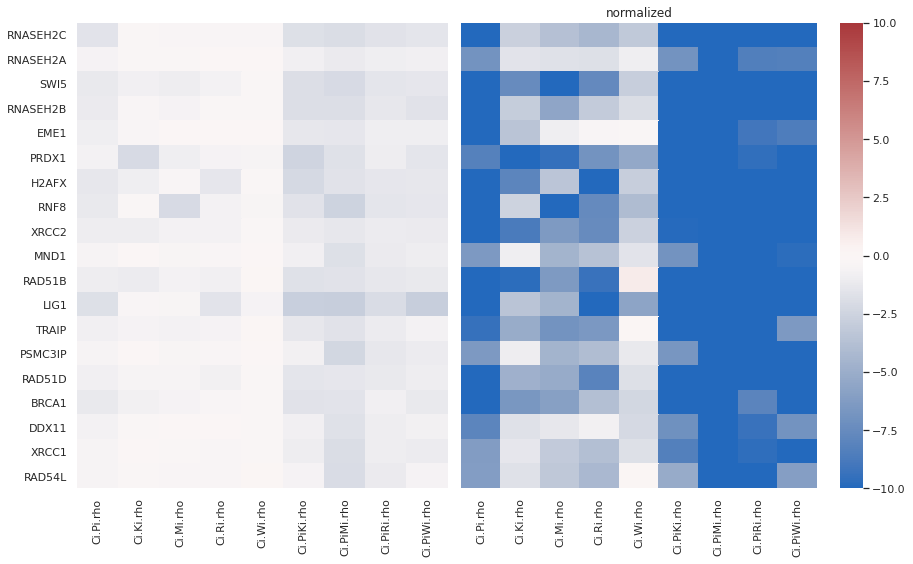

In [29]:
# # plot 

# f,(ax1,ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios':[0.1,0.12]}, figsize=(13,8))

# ax1.get_shared_y_axes().join(ax1,ax2)

# g1 = sns.heatmap(
#     Ci_df_rho.loc[sensitivity_genes,:], 
# #     annot=True,
#     vmin=-15, vmax=15,
#     cmap="vlag",
#     cbar=False,
#     ax=ax1
# )

# g1.set_ylabel('')
# g1.set_xlabel('')
# g1.set_title('')

# g2 = sns.heatmap(
#     Ci_df_rho_norm.loc[sensitivity_genes,:], 
# #     annot=True,
#     vmin=-10, vmax=10,
#     cmap="vlag",
#     ax=ax2
# )

# g2.set_ylabel('')
# g2.set_xlabel('')
# g2.set_title('normalized')
# g2.set_yticks([])

# # may be needed to rotate the ticklabels correctly:
# for ax in [g1,g2]:
#     tl = ax.get_xticklabels()
#     ax.set_xticklabels(tl, rotation=90)
#     tly = ax.get_yticklabels()
#     ax.set_yticklabels(tly, rotation=0)


# f.tight_layout()
# plt.savefig('figures/rho_zscore_heatmap.pdf')

## Ca UpSet.plot

In [63]:
# %%time 
# UpSetData_up = from_contents(dict([(screen+' up',Ca_data[screen]['up']) for screen in Ca_data]))
# UpSetData_dn = from_contents(dict([(screen+' dn',Ca_data[screen]['dn']) for screen in Ca_data]))

# min_degree=2

# # The PDF document
# pdf_pages = PdfPages('figures/rho_zscore_CRISPRa_upsetplot.pdf')

    
# fig_u1 = plt.figure(figsize=(5, 5), dpi=300)
# fig_u2 = plt.figure(figsize=(5, 5), dpi=300)

# u1 = UpSet(
#     UpSetData_up, subset_size='count',
# #     orientation='vertical',
#     show_counts='%d',
#     min_degree=min_degree
# ).plot(fig = fig_u1)
# fig_u1.suptitle('CRISPRa rho up (Z-Score normalized)\nResistance')
# pdf_pages.savefig(fig_u1)

# u2 = UpSet(
#     UpSetData_dn, subset_size='count',
# #     orientation='vertical',
#     show_counts='%d',
#     min_degree=min_degree
# ).plot(fig = fig_u2)
# fig_u2.suptitle('CRISPRa rho down (Z-Score normalized)\nSensitivity')
# pdf_pages.savefig(fig_u2)

# # Write the PDF document to the disk
# pdf_pages.close()

## CRISPRa/i UpSet.plot

In [64]:
# %%time 
# tmp = {}
# for C,data in zip(['CRISPRa','CRISPRi'],[Ca_data,Ci_data]):
#     for screen in data:
#         tmp[screen+f' {C} Resistance'] = data[screen]['up']
#         tmp[screen+f' {C} Sensitivity']= data[screen]['dn']
# UpSetData = from_contents(tmp)
    
# fig = plt.figure(figsize=(5, 5), dpi=300)

# u = UpSet(
#     UpSetData, subset_size='count',
# #     orientation='vertical',
#     show_counts='%d',
#     min_degree=4
# ).plot(fig = fig)
# fig.suptitle('CRISPRa/i (Z-Score normalized rho)')
# plt.savefig('figures/rho_zscore_CRISPRai_upsetplot.pdf')